In [137]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from io import StringIO
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)

from sklearn.cluster import KMeans




In [32]:
df = pd.read_csv("./sources/Airline_Delay_Cause.csv")
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",53.0,6.0,3.05,0.22,0.21,0.00,2.52,0.0,0.0,265.0,110.0,10.0,6.0,0.0,139.0
1,2019,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",115.0,4.0,0.03,0.00,1.35,0.00,2.62,0.0,2.0,157.0,1.0,0.0,40.0,0.0,116.0
2,2019,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",191.0,13.0,7.49,2.31,1.48,0.00,1.73,0.0,1.0,678.0,332.0,153.0,82.0,0.0,111.0
3,2019,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",6.0,1.0,0.00,0.00,1.00,0.00,0.00,0.0,0.0,19.0,0.0,0.0,19.0,0.0,0.0
4,2019,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",3802.0,468.0,115.80,11.79,148.86,0.45,191.11,3.0,0.0,32762.0,11503.0,608.0,4885.0,93.0,15673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80585,2014,12,WN,Southwest Airlines Co.,AMA,"Amarillo, TX: Rick Husband Amarillo International",151.0,56.0,26.18,2.39,4.96,0.00,22.47,3.0,1.0,2155.0,829.0,147.0,160.0,0.0,1019.0
80586,2014,12,WN,Southwest Airlines Co.,SJU,"San Juan, PR: Luis Munoz Marin International",354.0,67.0,22.42,1.00,9.45,0.00,34.14,0.0,0.0,3057.0,979.0,33.0,385.0,0.0,1660.0
80587,2014,12,WN,Southwest Airlines Co.,SLC,"Salt Lake City, UT: Salt Lake City International",807.0,323.0,135.76,0.98,33.75,1.15,151.35,3.0,0.0,14672.0,5356.0,26.0,1191.0,25.0,8074.0
80588,2014,12,EV,ExpressJet Airlines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_null = df[df.isna().any(axis=1)]
df_null

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1300,2019,12,OO,SkyWest Airlines Inc.,MLB,"Melbourne, FL: Melbourne Orlando International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4024,2019,10,DL,Delta Air Lines Inc.,PSC,"Pasco/Kennewick/Richland, WA: Tri Cities",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6199,2019,9,DL,Delta Air Lines Inc.,TVC,"Traverse City, MI: Cherry Capital",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6208,2019,9,EV,ExpressJet Airlines LLC,AVL,"Asheville, NC: Asheville Regional",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6232,2019,9,EV,ExpressJet Airlines LLC,ERI,"Erie, PA: Erie International/Tom Ridge Field",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79745,2014,12,DL,Delta Air Lines Inc.,TVC,"Traverse City, MI: Cherry Capital",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79936,2014,12,EV,ExpressJet Airlines Inc.,MCN,"Macon, GA: Middle Georgia Regional",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80001,2014,12,F9,Frontier Airlines Inc.,PIT,"Pittsburgh, PA: Pittsburgh International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80002,2014,12,F9,Frontier Airlines Inc.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Remove null values from dataset
df_1 = df.dropna(axis=0, how='any', inplace=False)
df_1

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",53.0,6.0,3.05,0.22,0.21,0.00,2.52,0.0,0.0,265.0,110.0,10.0,6.0,0.0,139.0
1,2019,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",115.0,4.0,0.03,0.00,1.35,0.00,2.62,0.0,2.0,157.0,1.0,0.0,40.0,0.0,116.0
2,2019,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",191.0,13.0,7.49,2.31,1.48,0.00,1.73,0.0,1.0,678.0,332.0,153.0,82.0,0.0,111.0
3,2019,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",6.0,1.0,0.00,0.00,1.00,0.00,0.00,0.0,0.0,19.0,0.0,0.0,19.0,0.0,0.0
4,2019,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",3802.0,468.0,115.80,11.79,148.86,0.45,191.11,3.0,0.0,32762.0,11503.0,608.0,4885.0,93.0,15673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80585,2014,12,WN,Southwest Airlines Co.,AMA,"Amarillo, TX: Rick Husband Amarillo International",151.0,56.0,26.18,2.39,4.96,0.00,22.47,3.0,1.0,2155.0,829.0,147.0,160.0,0.0,1019.0
80586,2014,12,WN,Southwest Airlines Co.,SJU,"San Juan, PR: Luis Munoz Marin International",354.0,67.0,22.42,1.00,9.45,0.00,34.14,0.0,0.0,3057.0,979.0,33.0,385.0,0.0,1660.0
80587,2014,12,WN,Southwest Airlines Co.,SLC,"Salt Lake City, UT: Salt Lake City International",807.0,323.0,135.76,0.98,33.75,1.15,151.35,3.0,0.0,14672.0,5356.0,26.0,1191.0,25.0,8074.0
80588,2014,12,EV,ExpressJet Airlines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_1 = df_1[~df_1.duplicated(keep=False)]

In [36]:
df_1

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",53.0,6.0,3.05,0.22,0.21,0.00,2.52,0.0,0.0,265.0,110.0,10.0,6.0,0.0,139.0
1,2019,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",115.0,4.0,0.03,0.00,1.35,0.00,2.62,0.0,2.0,157.0,1.0,0.0,40.0,0.0,116.0
2,2019,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",191.0,13.0,7.49,2.31,1.48,0.00,1.73,0.0,1.0,678.0,332.0,153.0,82.0,0.0,111.0
3,2019,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",6.0,1.0,0.00,0.00,1.00,0.00,0.00,0.0,0.0,19.0,0.0,0.0,19.0,0.0,0.0
4,2019,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",3802.0,468.0,115.80,11.79,148.86,0.45,191.11,3.0,0.0,32762.0,11503.0,608.0,4885.0,93.0,15673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80585,2014,12,WN,Southwest Airlines Co.,AMA,"Amarillo, TX: Rick Husband Amarillo International",151.0,56.0,26.18,2.39,4.96,0.00,22.47,3.0,1.0,2155.0,829.0,147.0,160.0,0.0,1019.0
80586,2014,12,WN,Southwest Airlines Co.,SJU,"San Juan, PR: Luis Munoz Marin International",354.0,67.0,22.42,1.00,9.45,0.00,34.14,0.0,0.0,3057.0,979.0,33.0,385.0,0.0,1660.0
80587,2014,12,WN,Southwest Airlines Co.,SLC,"Salt Lake City, UT: Salt Lake City International",807.0,323.0,135.76,0.98,33.75,1.15,151.35,3.0,0.0,14672.0,5356.0,26.0,1191.0,25.0,8074.0
80588,2014,12,EV,ExpressJet Airlines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df_1['carrier_name'].eq

<bound method Series.eq of 0               Endeavor Air Inc.
1               Endeavor Air Inc.
2               Endeavor Air Inc.
3               Endeavor Air Inc.
4               Endeavor Air Inc.
                   ...           
80585      Southwest Airlines Co.
80586      Southwest Airlines Co.
80587      Southwest Airlines Co.
80588    ExpressJet Airlines Inc.
80589       SkyWest Airlines Inc.
Name: carrier_name, Length: 80494, dtype: object>

In [38]:
print("Total Carries {} \n".format(df_1.carrier_name.nunique()))
value_counts_carrier = df_1.carrier_name.value_counts()
print("{} {}".format(value_counts_carrier.index, value_counts_carrier.values))


Total Carries 21 

Index(['SkyWest Airlines Inc.', 'Delta Air Lines Inc.',
       'ExpressJet Airlines Inc.', 'American Airlines Inc.',
       'United Air Lines Inc.', 'Southwest Airlines Co.', 'Envoy Air',
       'Alaska Airlines Inc.', 'Frontier Airlines Inc.', 'JetBlue Airways',
       'Allegiant Air', 'Mesa Airlines Inc.', 'Endeavor Air Inc.',
       'Spirit Air Lines', 'PSA Airlines Inc.', 'Republic Airline',
       'Hawaiian Airlines Inc.', 'ExpressJet Airlines LLC', 'Virgin America',
       'US Airways Inc.', 'AirTran Airways Corporation'],
      dtype='object', name='carrier_name') [12731  8922  7491  5772  5702  5270  4785  4091  4047  3916  2836  2515
  2480  2320  2230  2127  1048   847   836   508    20]


In [39]:
print("Total Airports {} \n".format(df_1.airport_name.nunique()))
print(df_1.airport_name.value_counts())


Total Airports 390 

airport_name
Detroit, MI: Detroit Metro Wayne County                       747
New Orleans, LA: Louis Armstrong New Orleans International    737
Washington, DC: Ronald Reagan Washington National             728
Atlanta, GA: Hartsfield-Jackson Atlanta International         718
New York, NY: LaGuardia                                       718
                                                             ... 
Williston, ND: Williston Basin International                    3
Youngstown/Warren, OH: Youngstown-Warren Regional               1
Fort Collins/Loveland, CO: Northern Colorado Regional           1
Mobile, AL: Mobile International                                1
Chico, CA: Chico Municipal                                      1
Name: count, Length: 390, dtype: int64


c:\Users\lenov\miniconda3\envs\flightdelay\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lenov\miniconda3\envs\flightdelay\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lenov\miniconda3\envs\flightdelay\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


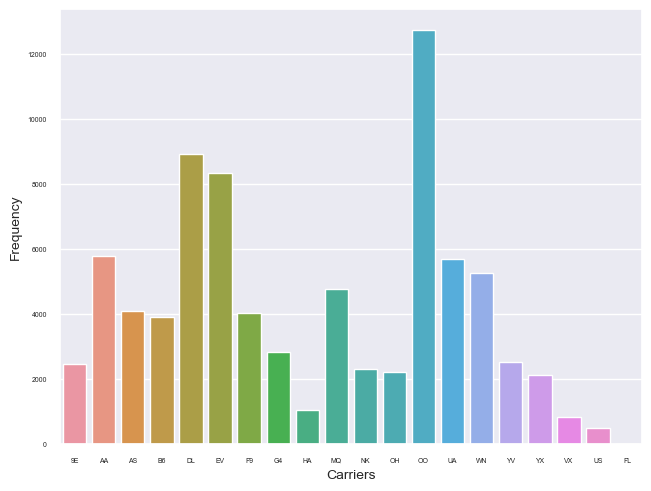

,count
carrier,
OO,12731
DL,8922
EV,8338
AA,5772
UA,5702
WN,5270
MQ,4785
AS,4091
F9,4047


In [40]:
plt.figure(layout='constrained')
sns.countplot(df_1, x='carrier')
plt.xticks(size = 5)
plt.yticks(size = 5)
plt.xlabel("Carriers", size = 10)
plt.ylabel("Frequency", size = 10)
plt.show()
df_1['carrier'].value_counts().to_frame()

Total Fligths Per Year 

year
2014     1163
2015    13513
2016    12195
2017    12503
2018    20193
2019    20927
Name: count, dtype: int64


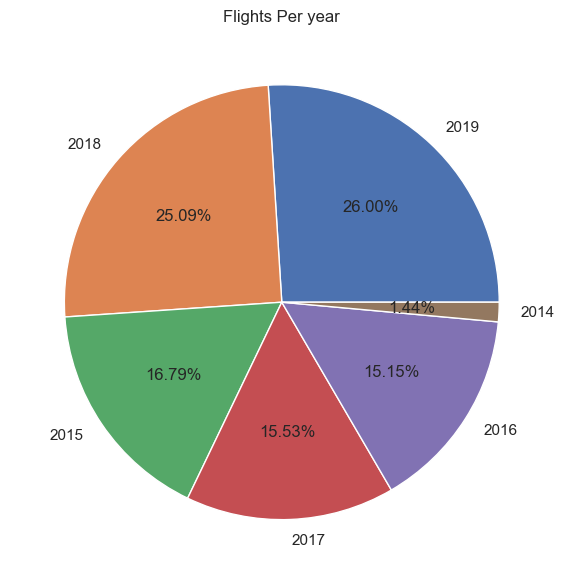

In [41]:
flights_per_year = df_1.year.value_counts()
print("Total Fligths Per Year \n")
print(flights_per_year.sort_index())

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(flights_per_year.values, labels = flights_per_year.index, autopct='%.2f%%')

ax.set_title('Flights Per year')
plt.tight_layout()


month
1     6603
2     6494
3     6558
4     6582
5     6522
6     6787
7     6592
8     6693
9     6568
10    6581
11    6622
12    7892
Name: count, dtype: int64


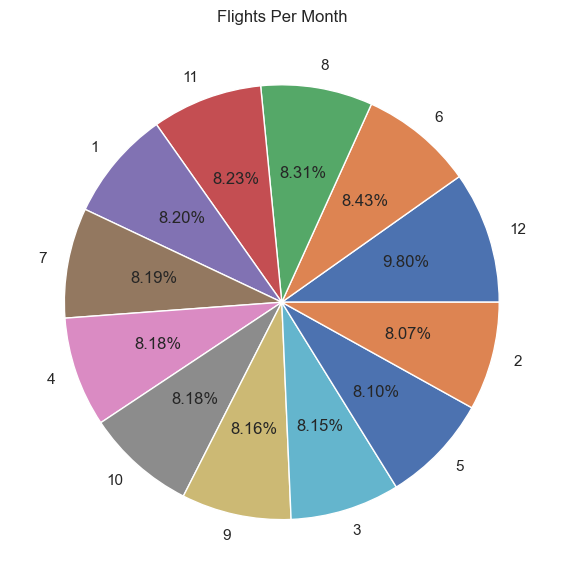

In [42]:
flights_per_month = df_1.month.value_counts()
print(flights_per_month.sort_index())
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(flights_per_month.values, labels = flights_per_month.index, autopct='%.2f%%')

ax.set_title('Flights Per Month')
plt.tight_layout()
      

In [43]:
df_1.loc[:, 'is_delayed'] = (df_1.late_aircraft_delay > 1).astype(int)
df_1

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,is_delayed
0,2019,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",53.0,6.0,3.05,0.22,0.21,0.00,2.52,0.0,0.0,265.0,110.0,10.0,6.0,0.0,139.0,1
1,2019,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",115.0,4.0,0.03,0.00,1.35,0.00,2.62,0.0,2.0,157.0,1.0,0.0,40.0,0.0,116.0,1
2,2019,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",191.0,13.0,7.49,2.31,1.48,0.00,1.73,0.0,1.0,678.0,332.0,153.0,82.0,0.0,111.0,1
3,2019,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",6.0,1.0,0.00,0.00,1.00,0.00,0.00,0.0,0.0,19.0,0.0,0.0,19.0,0.0,0.0,0
4,2019,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",3802.0,468.0,115.80,11.79,148.86,0.45,191.11,3.0,0.0,32762.0,11503.0,608.0,4885.0,93.0,15673.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80585,2014,12,WN,Southwest Airlines Co.,AMA,"Amarillo, TX: Rick Husband Amarillo International",151.0,56.0,26.18,2.39,4.96,0.00,22.47,3.0,1.0,2155.0,829.0,147.0,160.0,0.0,1019.0,1
80586,2014,12,WN,Southwest Airlines Co.,SJU,"San Juan, PR: Luis Munoz Marin International",354.0,67.0,22.42,1.00,9.45,0.00,34.14,0.0,0.0,3057.0,979.0,33.0,385.0,0.0,1660.0,1
80587,2014,12,WN,Southwest Airlines Co.,SLC,"Salt Lake City, UT: Salt Lake City International",807.0,323.0,135.76,0.98,33.75,1.15,151.35,3.0,0.0,14672.0,5356.0,26.0,1191.0,25.0,8074.0,1
80588,2014,12,EV,ExpressJet Airlines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [44]:
# flights no delay
df_1[df_1.late_aircraft_delay == 0]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,is_delayed
3,2019,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,19.0,0.0,0.0,0
27,2019,12,9E,Endeavor Air Inc.,CRW,"Charleston/Dunbar, WV: West Virginia Internati...",4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
28,2019,12,9E,Endeavor Air Inc.,CSG,"Columbus, GA: Columbus Airport",80.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,166.0,144.0,0.0,22.0,0.0,0.0,0
51,2019,12,9E,Endeavor Air Inc.,HRL,"Harlingen/San Benito, TX: Valley International",11.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,53.0,0.0,0.0,0.0,0.0,0
55,2019,12,9E,Endeavor Air Inc.,ILM,"Wilmington, NC: Wilmington International",9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80479,2014,12,US,US Airways Inc.,STX,"Christiansted, VI: Henry E. Rohlsen",2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,106.0,0.0,0.0,106.0,0.0,0.0,0
80480,2014,12,US,US Airways Inc.,TUS,"Tucson, AZ: Tucson International",2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
80493,2014,12,VX,Virgin America,MCO,"Orlando, FL: Orlando International",31.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,77.0,22.0,0.0,55.0,0.0,0.0,0
80588,2014,12,EV,ExpressJet Airlines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Percentage of Delayed Flights


<Figure size 600x600 with 0 Axes>

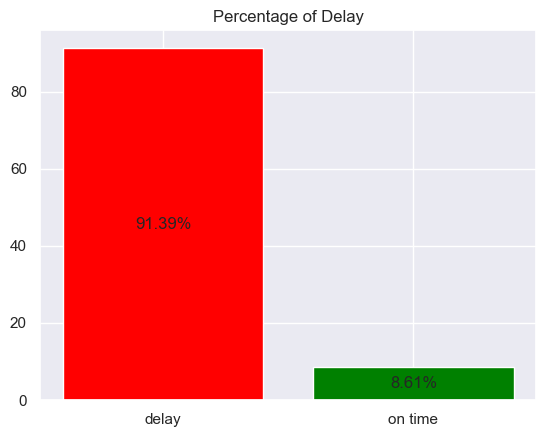

In [45]:
delayed_percentage = df_1.is_delayed.value_counts(normalize=True)
label_of_delay = {0: "on time", 1: "delay"}
delay_index = delayed_percentage.index
print("Percentage of Delayed Flights")

plt.figure(figsize = (6,6))
fig, ax = plt.subplots()
ax.set_title("Percentage of Delay")
p = ax.bar(list(map(label_of_delay.get, delay_index)), [x * 100 for x in delayed_percentage.values],
       color=["red", 'green'])
ax.bar_label(p, label_type="center", 
            fmt="%.2f%%" )

plt.show()



In [46]:
encoder = LabelEncoder()
df_1['carrier_name'] = encoder.fit_transform(df_1['carrier_name'])
carrier_name = {index : label for index, label in enumerate(encoder.classes_)}
carrier_name

{0: 'AirTran Airways Corporation',
 1: 'Alaska Airlines Inc.',
 2: 'Allegiant Air',
 3: 'American Airlines Inc.',
 4: 'Delta Air Lines Inc.',
 5: 'Endeavor Air Inc.',
 6: 'Envoy Air',
 7: 'ExpressJet Airlines Inc.',
 8: 'ExpressJet Airlines LLC',
 9: 'Frontier Airlines Inc.',
 10: 'Hawaiian Airlines Inc.',
 11: 'JetBlue Airways',
 12: 'Mesa Airlines Inc.',
 13: 'PSA Airlines Inc.',
 14: 'Republic Airline',
 15: 'SkyWest Airlines Inc.',
 16: 'Southwest Airlines Co.',
 17: 'Spirit Air Lines',
 18: 'US Airways Inc.',
 19: 'United Air Lines Inc.',
 20: 'Virgin America'}

In [47]:
df_1['airport'] = encoder.fit_transform(df_1['airport'])
airport = {index : label for index, label in enumerate(encoder.classes_)}
airport

{0: 'ABE',
 1: 'ABI',
 2: 'ABQ',
 3: 'ABR',
 4: 'ABY',
 5: 'ACK',
 6: 'ACT',
 7: 'ACV',
 8: 'ACY',
 9: 'ADK',
 10: 'ADQ',
 11: 'AEX',
 12: 'AGS',
 13: 'AKN',
 14: 'ALB',
 15: 'ALO',
 16: 'AMA',
 17: 'ANC',
 18: 'APN',
 19: 'ART',
 20: 'ASE',
 21: 'ATL',
 22: 'ATW',
 23: 'ATY',
 24: 'AUS',
 25: 'AVL',
 26: 'AVP',
 27: 'AZA',
 28: 'AZO',
 29: 'BDL',
 30: 'BET',
 31: 'BFF',
 32: 'BFL',
 33: 'BFM',
 34: 'BGM',
 35: 'BGR',
 36: 'BHM',
 37: 'BIL',
 38: 'BIS',
 39: 'BJI',
 40: 'BKG',
 41: 'BLI',
 42: 'BLV',
 43: 'BMI',
 44: 'BNA',
 45: 'BOI',
 46: 'BOS',
 47: 'BPT',
 48: 'BQK',
 49: 'BQN',
 50: 'BRD',
 51: 'BRO',
 52: 'BRW',
 53: 'BTM',
 54: 'BTR',
 55: 'BTV',
 56: 'BUF',
 57: 'BUR',
 58: 'BWI',
 59: 'BZN',
 60: 'CAE',
 61: 'CAK',
 62: 'CDC',
 63: 'CDV',
 64: 'CEC',
 65: 'CGI',
 66: 'CHA',
 67: 'CHO',
 68: 'CHS',
 69: 'CIC',
 70: 'CID',
 71: 'CIU',
 72: 'CKB',
 73: 'CLD',
 74: 'CLE',
 75: 'CLL',
 76: 'CLT',
 77: 'CMH',
 78: 'CMI',
 79: 'CMX',
 80: 'CNY',
 81: 'COD',
 82: 'COS',
 83: 'COU',
 8

In [48]:
df_1['airport_name'] = encoder.fit_transform(df_1['airport_name'])
airport_name = {index : label for index, label in enumerate(encoder.classes_)}
airport_name

{0: 'Aberdeen, SD: Aberdeen Regional',
 1: 'Abilene, TX: Abilene Regional',
 2: 'Adak Island, AK: Adak',
 3: 'Aguadilla, PR: Rafael Hernandez',
 4: 'Akron, OH: Akron-Canton Regional',
 5: 'Albany, GA: Southwest Georgia Regional',
 6: 'Albany, NY: Albany International',
 7: 'Albuquerque, NM: Albuquerque International Sunport',
 8: 'Alexandria, LA: Alexandria International',
 9: 'Allentown/Bethlehem/Easton, PA: Lehigh Valley International',
 10: 'Alpena, MI: Alpena County Regional',
 11: 'Amarillo, TX: Rick Husband Amarillo International',
 12: 'Anchorage, AK: Ted Stevens Anchorage International',
 13: 'Appleton, WI: Appleton International',
 14: 'Arcata/Eureka, CA: California Redwood Coast Humboldt County',
 15: 'Asheville, NC: Asheville Regional',
 16: 'Ashland, WV: Tri-State/Milton J. Ferguson Field',
 17: 'Aspen, CO: Aspen Pitkin County Sardy Field',
 18: 'Atlanta, GA: Hartsfield-Jackson Atlanta International',
 19: 'Atlantic City, NJ: Atlantic City International',
 20: 'Augusta, GA:

In [49]:
df_1['carrier'] = encoder.fit_transform(df_1['carrier'])
carrier = {index : label for index, label in enumerate(encoder.classes_)}
carrier

{0: '9E',
 1: 'AA',
 2: 'AS',
 3: 'B6',
 4: 'DL',
 5: 'EV',
 6: 'F9',
 7: 'FL',
 8: 'G4',
 9: 'HA',
 10: 'MQ',
 11: 'NK',
 12: 'OH',
 13: 'OO',
 14: 'UA',
 15: 'US',
 16: 'VX',
 17: 'WN',
 18: 'YV',
 19: 'YX'}

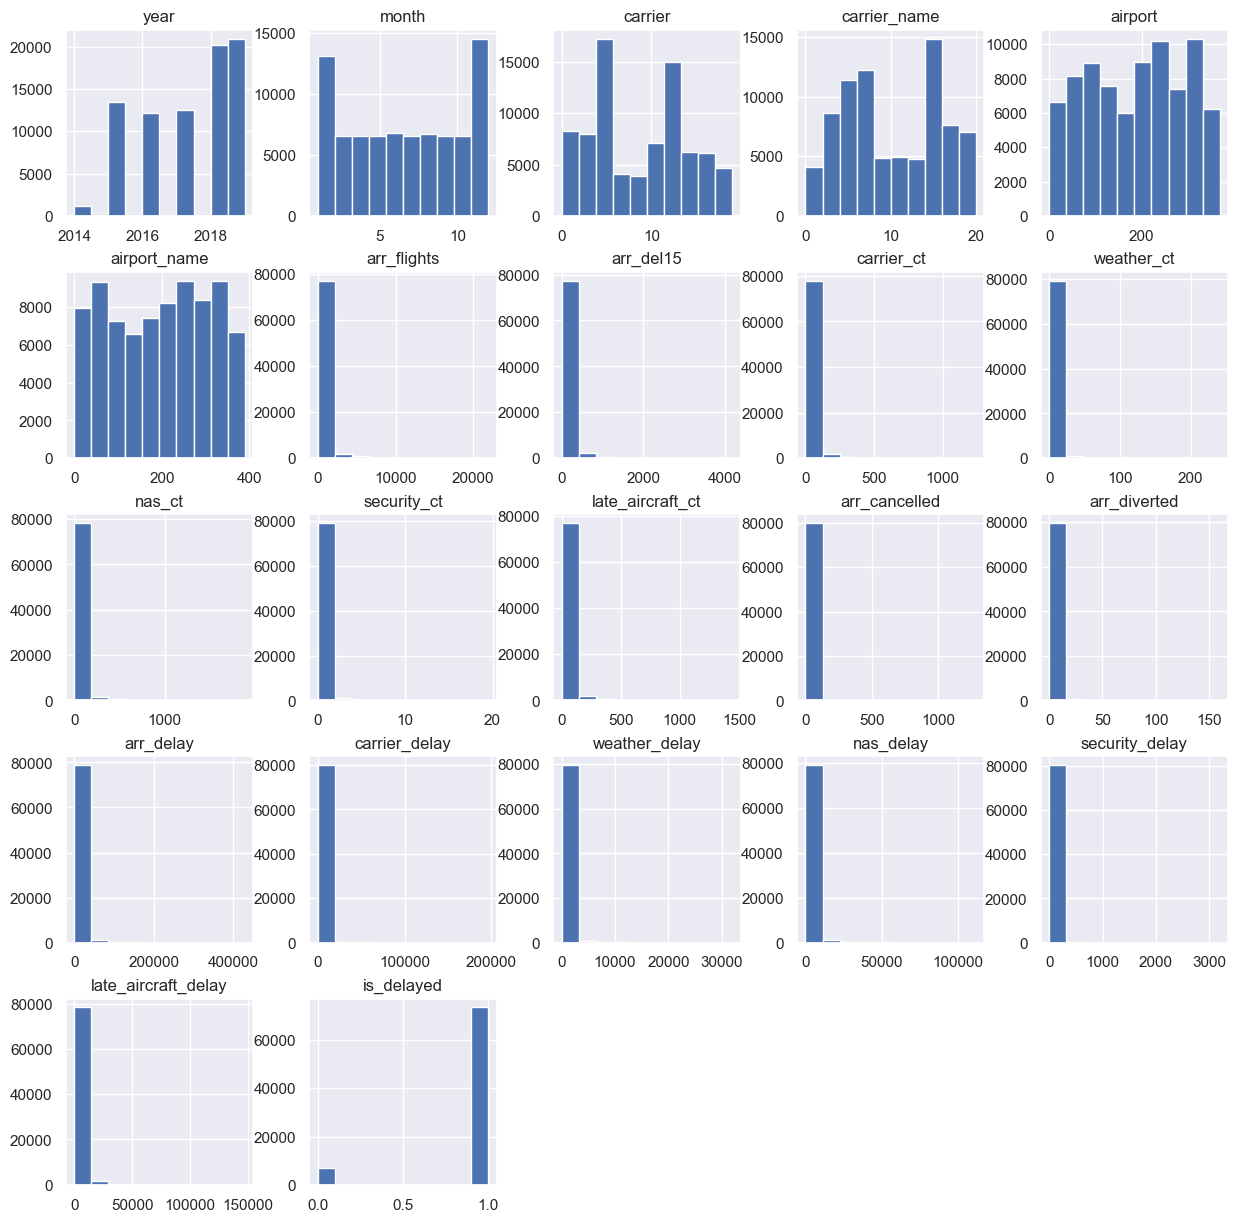

In [50]:
sns.set();
df_1.hist(figsize=(15,15));

In [51]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80494 entries, 0 to 80589
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 80494 non-null  int64  
 1   month                80494 non-null  int64  
 2   carrier              80494 non-null  int32  
 3   carrier_name         80494 non-null  int32  
 4   airport              80494 non-null  int32  
 5   airport_name         80494 non-null  int32  
 6   arr_flights          80494 non-null  float64
 7   arr_del15            80494 non-null  float64
 8   carrier_ct           80494 non-null  float64
 9   weather_ct           80494 non-null  float64
 10  nas_ct               80494 non-null  float64
 11  security_ct          80494 non-null  float64
 12  late_aircraft_ct     80494 non-null  float64
 13  arr_cancelled        80494 non-null  float64
 14  arr_diverted         80494 non-null  float64
 15  arr_delay            80494 non-null  floa

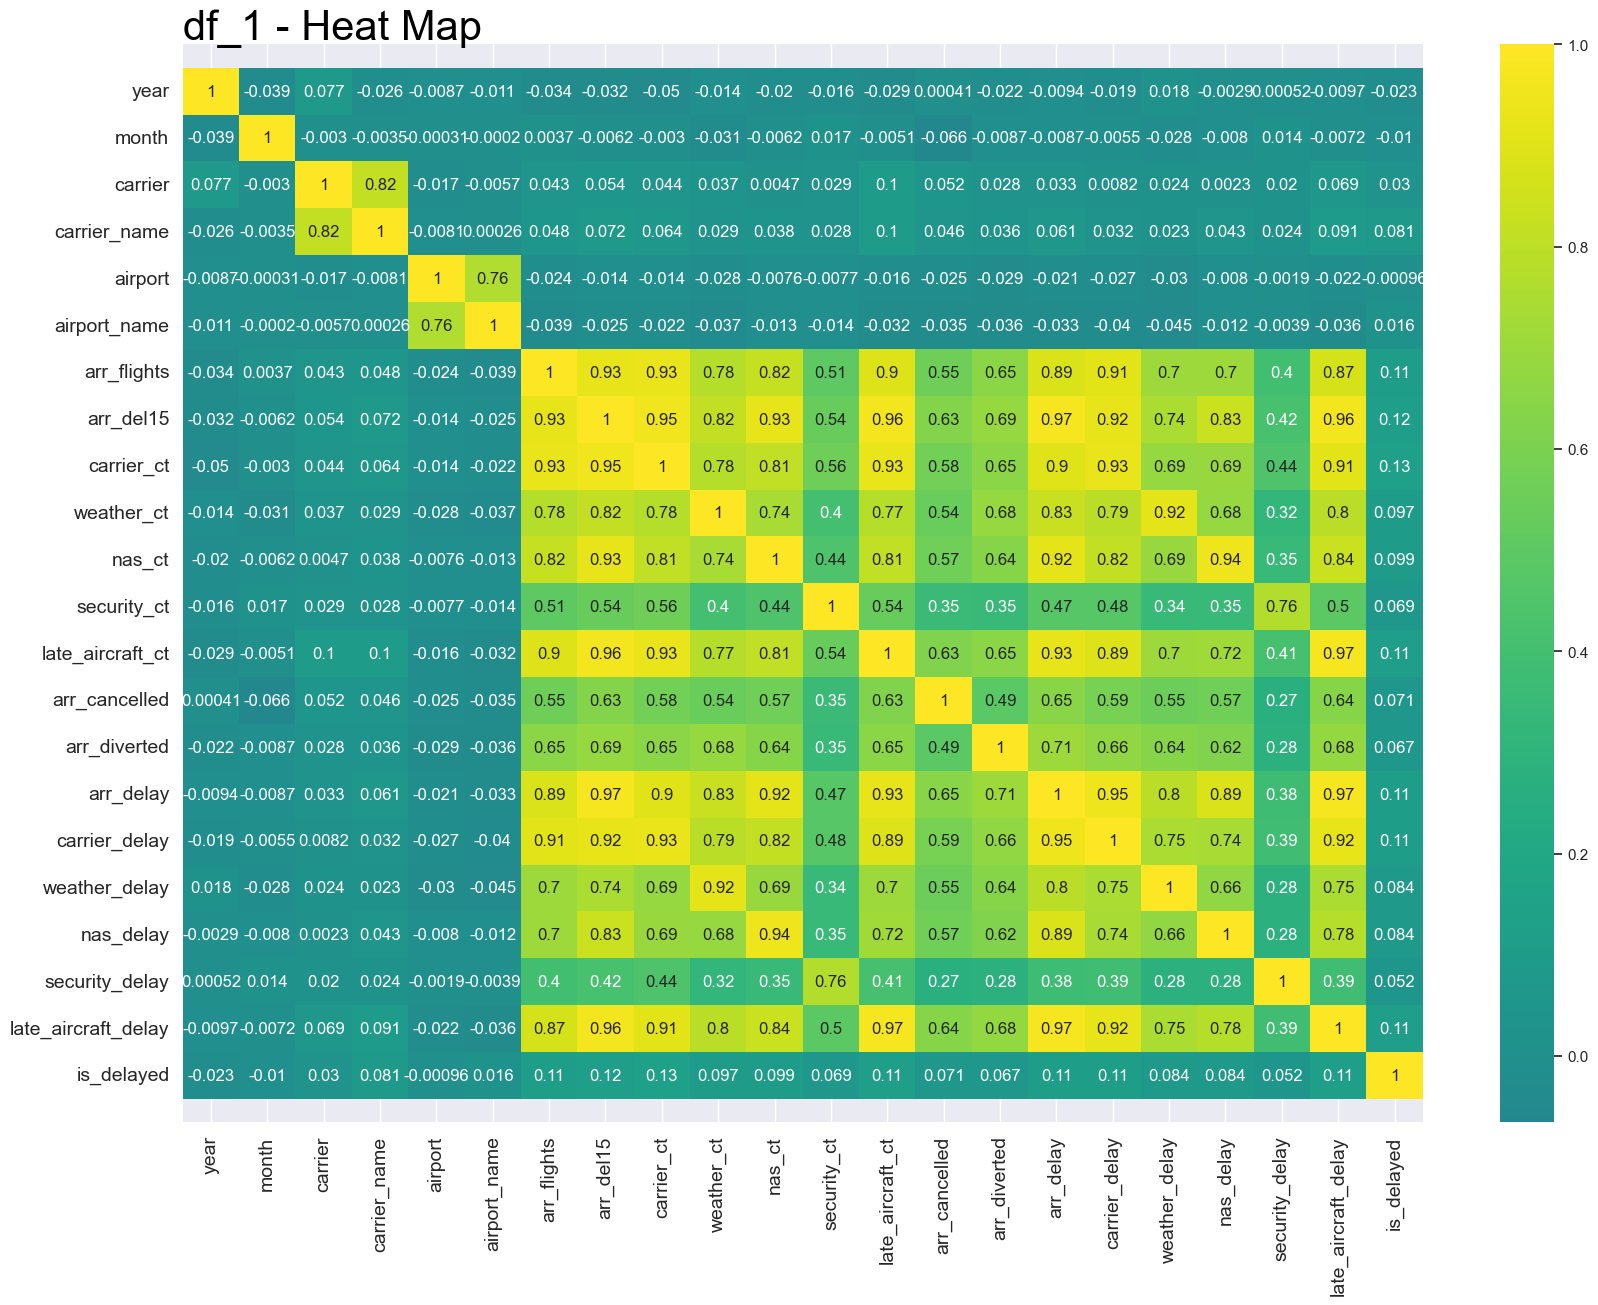

In [52]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(df_1.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "df_1 - Heat Map", fontsize = 30, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

array([1, 1, 1, ..., 0, 0, 1])

In [148]:
scaler = MinMaxScaler()
df_1 = df_1[]
df_1 = scaler.fit_transform(df_1)

X = df_1[:, :-1]
n_clusters = 3
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
Y = kmeans.labels_


In [155]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=5, random_state=33)
output_rfr = cross_validate(RandomForestRegressorModel, X, Y, cv=2, scoring=["r2"])
print(output_rfr)


{'fit_time': array([17.47402692, 14.18306017]),
 'score_time': array([0.08152556, 0.09277606]),
 'test_score': array([0.98082484, 0.99211029])}

In [174]:
linear_regression = LinearRegression()
output_lr = cross_validate(linear_regression, X, Y, cv=2, scoring=["r2", 'neg_mean_squared_error'])
print(output_lr)


{'fit_time': array([0.03959799, 0.0411303 ]), 'score_time': array([0.00490689, 0.00602055]), 'test_r2': array([ 7.48964997e-01, -1.34171902e+12]), 'test_neg_mean_squared_error': array([-6.13690674e-02, -3.24667962e+11])}


In [176]:
decision_tree = DecisionTreeRegressor()
output_dt = cross_validate(decision_tree, X, Y, cv=2, scoring=["r2", 'neg_mean_squared_error'])
print(output_dt)

{'fit_time': array([0.25118256, 0.23660254]), 'score_time': array([0.00426292, 0.00410175]), 'test_r2': array([0.9942067, 0.9968169]), 'test_neg_mean_squared_error': array([-0.00141625, -0.00077024])}


In [178]:
extra_trees = ExtraTreesRegressor()
output_et = cross_validate(extra_trees, X, Y, cv=2, scoring=["r2", 'neg_mean_squared_error'])
print(output_et)

{'fit_time': array([2.64767909, 2.16746593]), 'score_time': array([0.09376049, 0.12011719]), 'test_r2': array([0.99577968, 0.99800573]), 'test_neg_mean_squared_error': array([-0.00103172, -0.00048257])}


Mean Squared Error Value is :  0.0
